In [2]:
import numpy as np

sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower')
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models')
import matplotlib.pyplot as plt
import helper
import scipy.io.wavfile as wav

from least_squares import opt_amplitude
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi')
from midi import process_midi_to_note_info, notes_to_chords, dict_to_frequency_list, plot_piece



/var/folders/n4/k97yk30s1wn32d7y6729kph80000gn/T/ipykernel_45920/3241047550.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(wav_file)


Text(0.5, 1.0, 'Audioframe of 2000 audio samples of a single A4 (440 Hz) piano note')

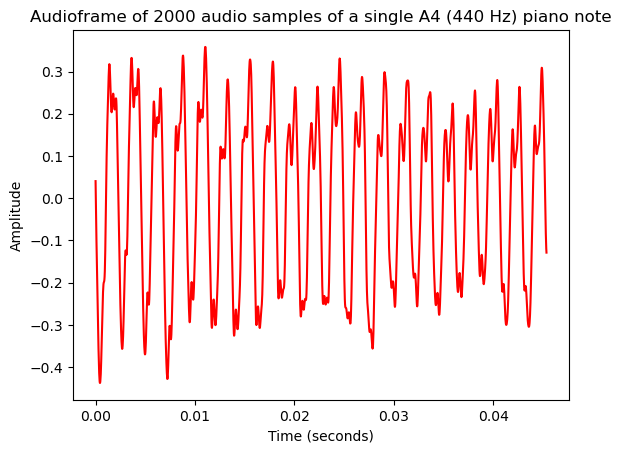

In [27]:
wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/A_440_piano.wav'
sample_rate, data = wav.read(wav_file)
data1 = data[5000:7000]
time_samples = np.linspace(
    0, len(data1)/sample_rate, len(data1))
helper.plot_audio(time_samples, data1)
plt.title('Audioframe of 2000 audio samples of a single A4 (440 Hz) piano note')

# data2 = data[8000:9000]
# time_samples = np.linspace(
#     0, len(data2)/sample_rate, len(data2))
# helper.plot_audio(time_samples, data2)


# data3 = data[18000:19000]
# time_samples = np.linspace(
#     0, len(data3)/sample_rate, len(data3))
# helper.plot_audio(time_samples, data3)

# print(np.sum(np.abs(data1)),np.sum(np.abs(data2)),np.sum(np.abs(data3)))
# helper.plot_fft(data2, power_spectrum=True)

# probs = []
# frequencies = np.arange(20, 262*2, 10)
# for f in frequencies:
#     probs.append(-helper.stable_nlml(time_samples, data,normalised=False,
#                  f=[f], T=2, sigma_n=0.01,  M=10))
# print(probs)
# plt.plot(frequencies, probs)
# plt.show()

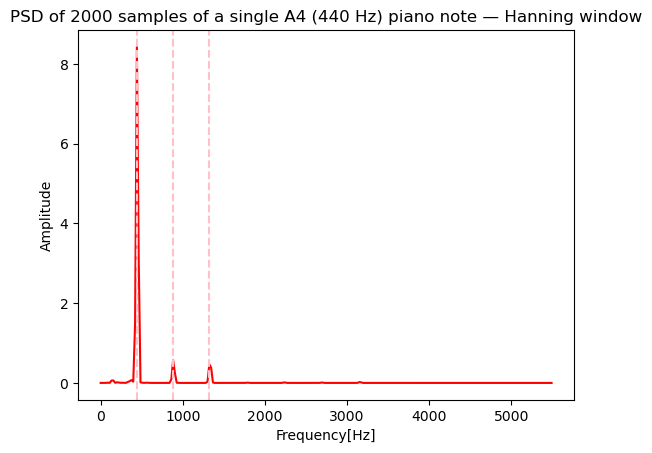

NameError: name 'lml' is not defined

In [35]:
helper.plot_fft(data1, power_spectrum=True)
plt.axvline(x=440, color='pink', linestyle='--')
plt.axvline(x=440*2, color='pink', linestyle='--')
plt.axvline(x=440*3, color='pink', linestyle='--')
# plt.axvline(x=440*4, color='pink', linestyle='--')
# plt.axvline(x=440*5, color='pink', linestyle='--')
# plt.axvline(x=440*6, color='pink', linestyle='--')
# plt.axvline(x=440*7, color='pink', linestyle='--')
plt.title("PSD of 2000 samples of a single A4 (440 Hz) piano note — Hanning window")
plt.show()
# probs = []
# a1 = abs(opt_amplitude(data1, show=True,M=1, T=0.465, v=2.37, missing_fund=0, f=[440])[0])
# plt.axvline(x=440, color='green', linestyle='--')
# plt.axvline(x=440*6, color='green', linestyle='--')
# plt.axvline(x=440*3, color='green', linestyle='--')
# plt.show()
# a2 = abs(opt_amplitude(data2, show=True,M=1, T=0.465, v=2.37, missing_fund=0, f=[440])[0])
# plt.show()
# a3 = abs(opt_amplitude(data3, show=True,M=1,  T=0.465, v=2.37, missing_fund=0, f=[440])[0])
# plt.show()
# print(a1, a2, a3)
# sigma_ns = np.arange(0.001, 1000, 1)
# # for i in sigma_ns:



# probs.append(-helper.stable_nlml(time_samples,
#                     data1, f=[440],M=9,   sigma_n=0.1,sigma_f =0.05, normalised=False, amplitude=a1))
# probs.append(-helper.stable_nlml(time_samples,
#                  data2, f=[440],M=9,  sigma_n=0.1, sigma_f =0.05,normalised=False, amplitude=a2))
# probs.append(-helper.stable_nlml(time_samples,
#                  data3, f=[440],M=9,normalised=False, sigma_f =0.05, sigma_n=0.1, amplitude=a3))
# lml = np.array(probs)
# print(lml)
# lml = lml/np.sum(abs(lml))


ml = np.exp(lml)
print(ml)
ml = ml/np.sum(abs(ml))
print(ml)

In [35]:
cov_dict = {}

note_info = process_midi_to_note_info('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi_files/Bach_1.midi')
        

dic = notes_to_chords(note_info, sustain=False)

score = dict_to_frequency_list(dic)
for state in score[:100]:
    if str(state) not in cov_dict:
        cov_dict[str(state)] = helper.SM_kernel(
            time_samples, time_samples, M=9,  f=state, sigma_f=0.1, T=0.465, v=2.37) + 0.1**2 * np.eye(1000)



In [50]:
from librosa import note_to_hz as hz
import time
freqs = hz([["C4"], ["C#4"],["D4"],["D#4"],["E4"],["F4"],["F#4"],["G4"],["G#4"],["A4"],["A#4"],["B4"]])

for freq in freqs:
    if str(freq[0]) not in cov_dict:
        cov_dict[str(state)] = helper.SM_kernel(
            time_samples, time_samples, M=9,  f=freq, sigma_f=0.1, T=0.465, v=2.37) + 0.1**2 * np.eye(1000)
probs = []
time1 = time.time()
for freq in freqs:
    probs.append(-helper.stable_nlml(time_samples,
                    data1, f=freq,M=9,  cov_dict=cov_dict, sigma_n=0.1,sigma_f =0.1,T=0.465, v=2.37, normalised=False, amplitude=None))
time2=time.time()
print(time2-time1)
lml = np.array(probs)
lml = lml/np.sum(abs(lml))
print(lml)
ml = np.exp(lml)
# ml = ml/np.sum(ml)
print(ml)

0.8755161762237549
[-0.09953143 -0.10198053 -0.09953729 -0.10240585 -0.10091606 -0.10125897
 -0.09821078 -0.09572759 -0.05064043  0.01988975 -0.03291903 -0.09698229]
[0.9052615  0.90304713 0.90525619 0.90266314 0.90400891 0.90369897
 0.90645782 0.90871152 0.95062043 1.02008887 0.96761691 0.90757208]


0 1
1 3


(2, [1, 2, 3, 8, 7, 5])

In [102]:
probs=[]
probs.append(-helper.stable_nlml(time_samples,
                 data1, f=[440],   sigma_n=0.1, normalised=False, amplitude=None))
probs.append(-helper.stable_nlml(time_samples,
                 data2, f=[440],  sigma_n=0.1, normalised=False, amplitude=None))
probs.append(-helper.stable_nlml(time_samples,
                 data3, f=[440],normalised=False,  sigma_n=0.1, amplitude=None))
lml = np.array(probs)
print(lml)
lml = lml/np.sum(abs(lml))
ml = np.exp(lml)
print(ml)

[1119.08185019 1151.26356534 1168.45254775]
[1.38462342 1.39764213 1.4046458 ]
